# Probe 2

### Setup

In [1]:
# listen to changes
%load_ext autoreload
%autoreload 2

import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
import spikeinterface as si

# set project path
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config

# SETUP PARAMETERS
SAMPFREQ = 20000  # hz

# silico
data_conf, param_conf_sili = get_config(
    "silico_horvath", "concatenated/probe_2"
).values()
PREPRO_PATH = data_conf["preprocessing"]["output"]["trace_file_path"]

# FIGURE SETTINGS
FIGSIZE = (1.05, 2.10)
# colors
COLOR_S = [0.9, 0.14, 0.15]
# axes
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6  # 5-7 with Nature neuroscience as reference
plt.rcParams["lines.linewidth"] = 0.3
plt.rcParams["axes.linewidth"] = 0.3  # 1
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.major.width"] = 0.3  # 0.8 #* 1.3
plt.rcParams["xtick.minor.width"] = 0.3  # 0.8 #* 1.3
plt.rcParams["ytick.major.width"] = 0.3  # 0.8 #* 1.3
plt.rcParams["ytick.minor.width"] = 0.3  # 0.8 #* 1.3
plt.rcParams["xtick.major.size"] = 3.5 * 1.1
plt.rcParams["xtick.minor.size"] = 2 * 1.1
plt.rcParams["ytick.major.size"] = 3.5 * 1.1
plt.rcParams["ytick.minor.size"] = 2 * 1.1
# legend
savefig_cfg = {"transparent": True, "dpi": 300}
legend_cfg = {"frameon": False, "handletextpad": 0.1}
tight_layout_cfg = {"pad": 0.5}
LG_FRAMEON = False  # no legend frame

2024-06-18 14:57:53,888 - root - utils.py - get_config - INFO - Reading experiment config.
2024-06-18 14:57:53,913 - root - utils.py - get_config - INFO - Reading experiment config. - done


In [2]:
def plot_probe(Recording):
    Probe = Recording.get_probe()

    # plot file contact with ids
    # fig, ax = plt.subplots(1, 1, figsize=(2, 10), mode="projection_3D")
    ax = plt.figure(figsize=(10, 20)).add_subplot(projection="3d")
    ax.view_init(0, -40, 0)
    ax.plot(
        Probe.contact_positions[:, 0],
        Probe.contact_positions[:, 1],
        Probe.contact_positions[:, 2],
        "o",
        markerfacecolor="w",
        color="k",
        markersize=6,
    )
    for ix in range(len(Probe.contact_positions)):
        if ix % 1 == 0:
            ax.text(
                Probe.contact_positions[ix, 0],
                Probe.contact_positions[ix, 1],
                Probe.contact_positions[ix, 2],
                "%s" % (str(Probe.contact_ids[ix])),
                size=12,
                zorder=100,
                color="r",
            )
    ax.set_xlabel("x", fontsize=20)
    ax.set_ylabel("y", fontsize=20)
    ax.set_zlabel("z", fontsize=20)

    # highlight order
    # first site
    ax.plot(
        Probe.contact_positions[0, 0],
        Probe.contact_positions[0, 1],
        Probe.contact_positions[0, 2],
        "ro",
        markersize=10,
    )

    # highlight order
    # second site
    ax.plot(
        Probe.contact_positions[1, 0],
        Probe.contact_positions[1, 1],
        Probe.contact_positions[1, 2],
        "bo",
        markersize=10,
    )

    # highlight order
    # third site
    ax.plot(
        Probe.contact_positions[2, 0],
        Probe.contact_positions[2, 1],
        Probe.contact_positions[2, 2],
        "go",
        markersize=10,
    )
    ax.set_box_aspect((1, 16, 16))

/gpfs/bbp.cscs.ch/project/proj85/laquitai/spikebias_paper/envs/spikinterf0_100_5/lib/python3.9/site-packages/spikeinterface/core/base.py:1079: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(
/gpfs/bbp.cscs.ch/project/proj85/laquitai/spikebias_paper/envs/spikinterf0_100_5/lib/python3.9/site-packages/spikeinterface/core/binaryrecordingextractor.py:78: UserWarning: `num_chan` is to be deprecated in version 0.100, please use `num_channels` instead
  warnings.warn("`num_chan` is to be deprecated in version 0.100, please use `num_channels` instead")


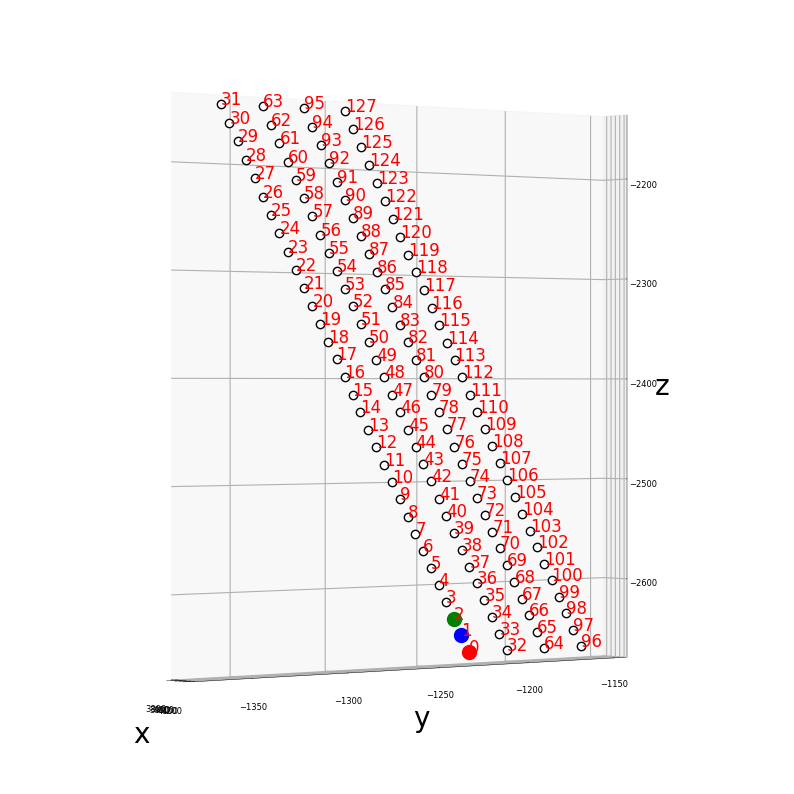

In [3]:
# get preprocessed
Recording = si.load_extractor(PREPRO_PATH)

plot_probe(Recording)